# Clustering food items in a database

## Data Cleaning and Preprocessing

This section showcases the process of data cleaning and preprocessing on a dataset containing information about various products. We will use Python and libraries such as Pandas, NumPy, and Matplotlib to load, filter, clean, and visualize the data.

### Dataset Description

The dataset, stored in a CSV file named 'products.csv', contains information about different products, including their names and various nutritional values per 100 grams. The nutritional values include proteins, carbohydrates, fat, sugars, sodium, and energy content.

### Steps in Data Cleaning and Preprocessing

1. **Data Loading and Initial Exploration:** We start by loading the dataset into a Pandas DataFrame and exploring the first few rows to understand the structure of the data.

2. **Handling Missing Values:** We calculate the percentage of missing values in each column and visualize it using a horizontal bar chart. Missing values are addressed to ensure a comprehensive analysis.

3. **Filtering Columns of Interest:** We extract the columns relevant for our analysis, which include 'product_name', 'proteins_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'sodium_100g', and 'energy_100g'. This step simplifies the dataset and improves readability.

4. **Removing Outliers:** We eliminate outliers from the dataset using a factor 'f' to set boundaries based on percentiles. Outliers can significantly affect data analysis, and this step ensures robust results.

5. **Data Integrity Check:** We further filter the dataset to remove rows where any of the nutritional values exceed 100 grams or where energy_100g is not calculated correctly (energy = 4 * proteins + 4 * carbohydrates + 9 * fat). This ensures data integrity and meaningful analysis.

6. **Handling Missing Product Names:** We remove rows where the 'product_name' is missing to avoid ambiguity in product identification.

7. **Data Imputation:** For the remaining missing values in numeric columns, we impute them using the mean of each respective column. This enables us to retain valuable data points without introducing bias.

8. **Saving the Cleaned Data:** Finally, the cleaned DataFrame is saved to a new CSV file named 'cleaned.csv' without an index column for further analysis.

### Results and Visualizations

Throughout this section, we use visualizations, such as bar charts, to demonstrate the distribution of missing values and the impact of data cleaning on the dataset.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans as km
from mpl_toolkits.mplot3d import axes3d

In [2]:
# Load data from 'products.csv' using Pandas and display the first few rows
df = pd.read_csv('products.csv', sep='\t')
df.head()
# Check the shape of the dataframe (number of rows and columns)
df.shape

/tmp/ipykernel_24705/17410409.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('products.csv', sep='\t')


(320772, 162)

<Axes: >

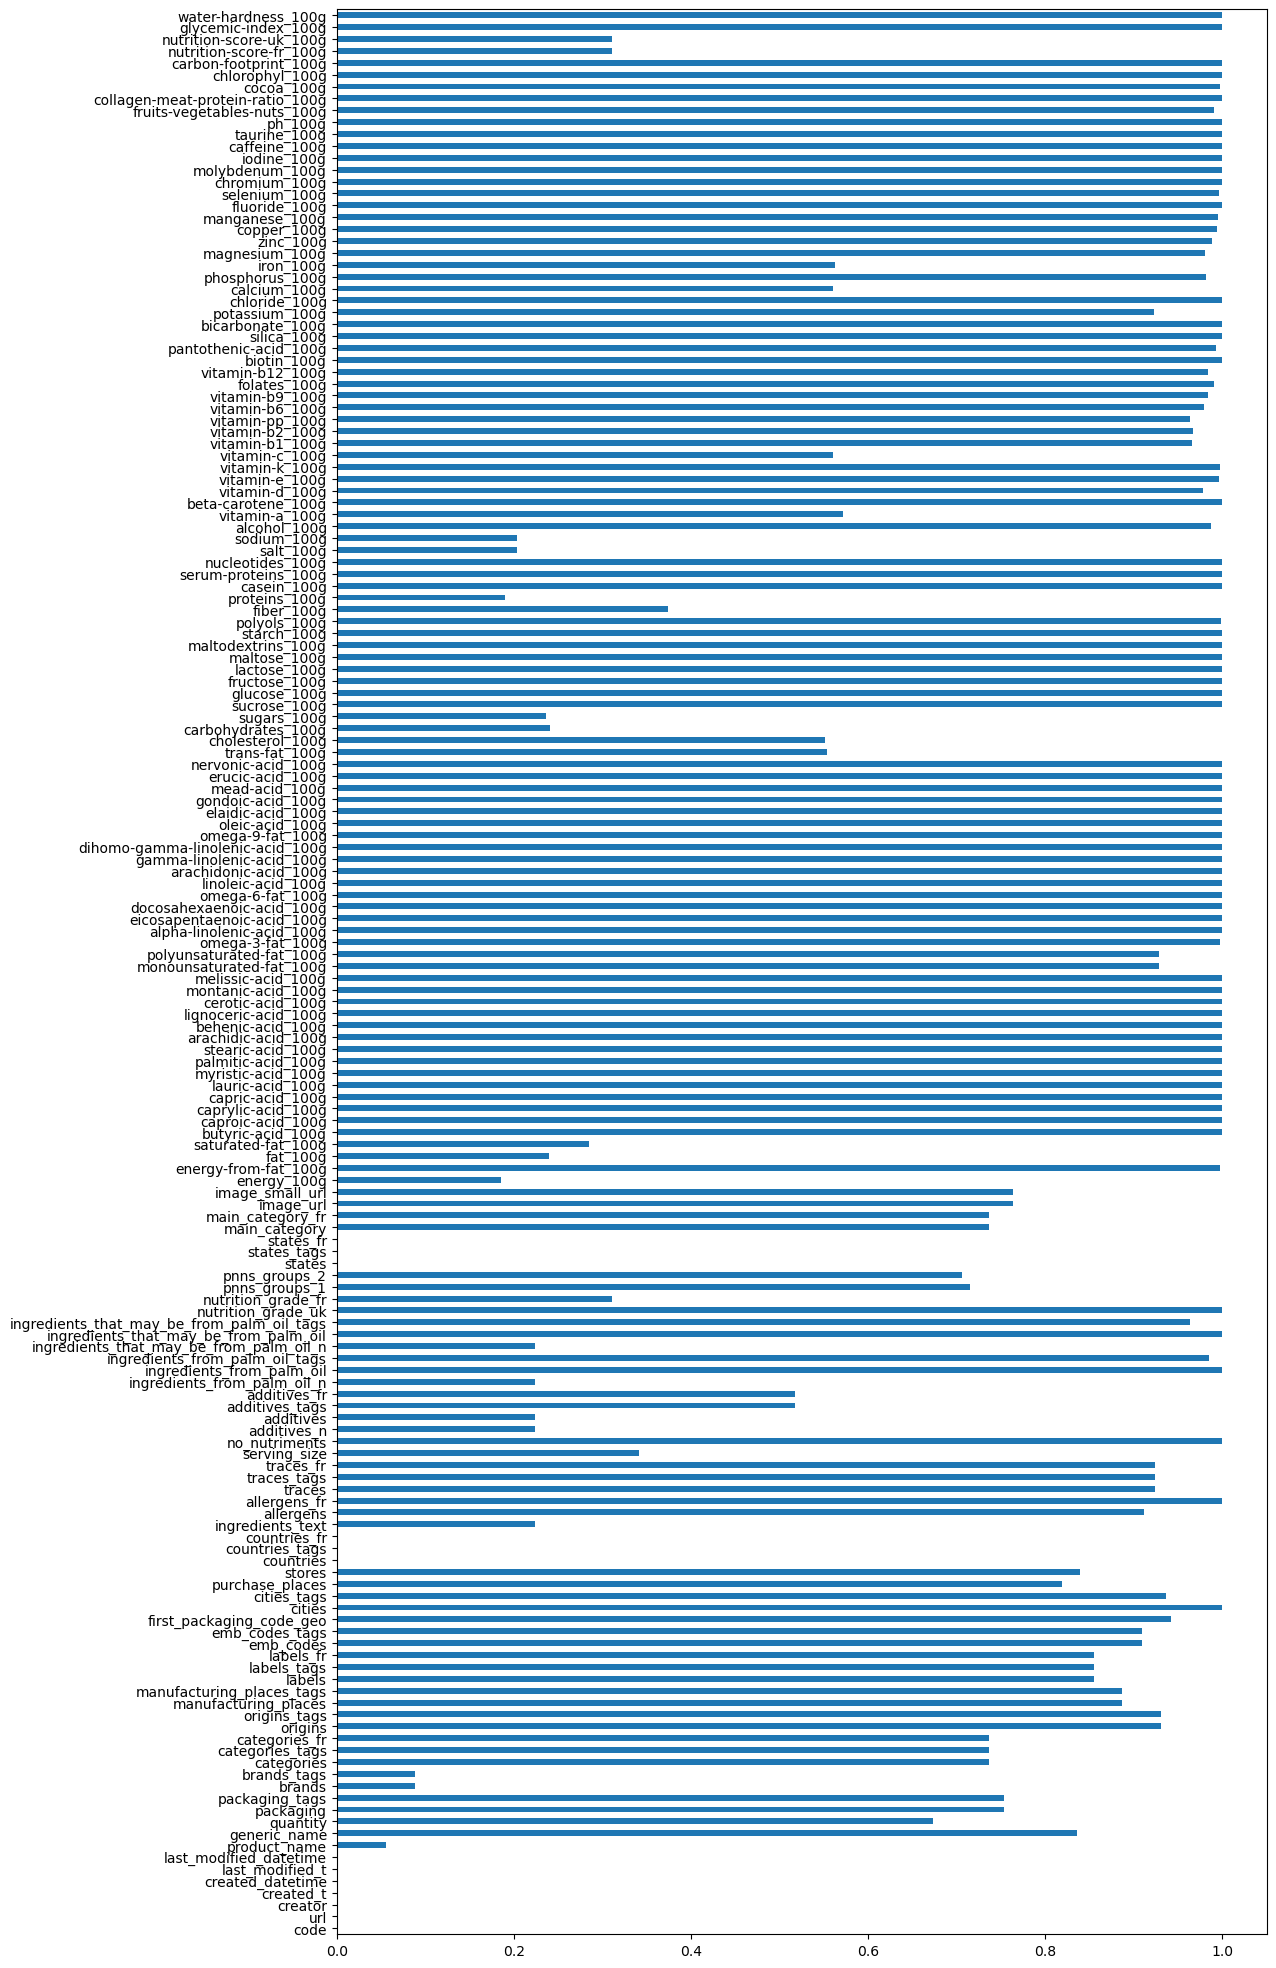

In [3]:
# Calculate the percentage of missing values in each column and plot the results as a horizontal bar chart
df.isnull().mean(axis=0).plot.barh(figsize=(12, 25))

In [4]:
# Select only the columns of interest from the original dataframe
df1 = df[['product_name',
          'proteins_100g',
          'carbohydrates_100g',
          'fat_100g',
          'sugars_100g',
          'sodium_100g',
          'energy_100g']]

<Axes: >

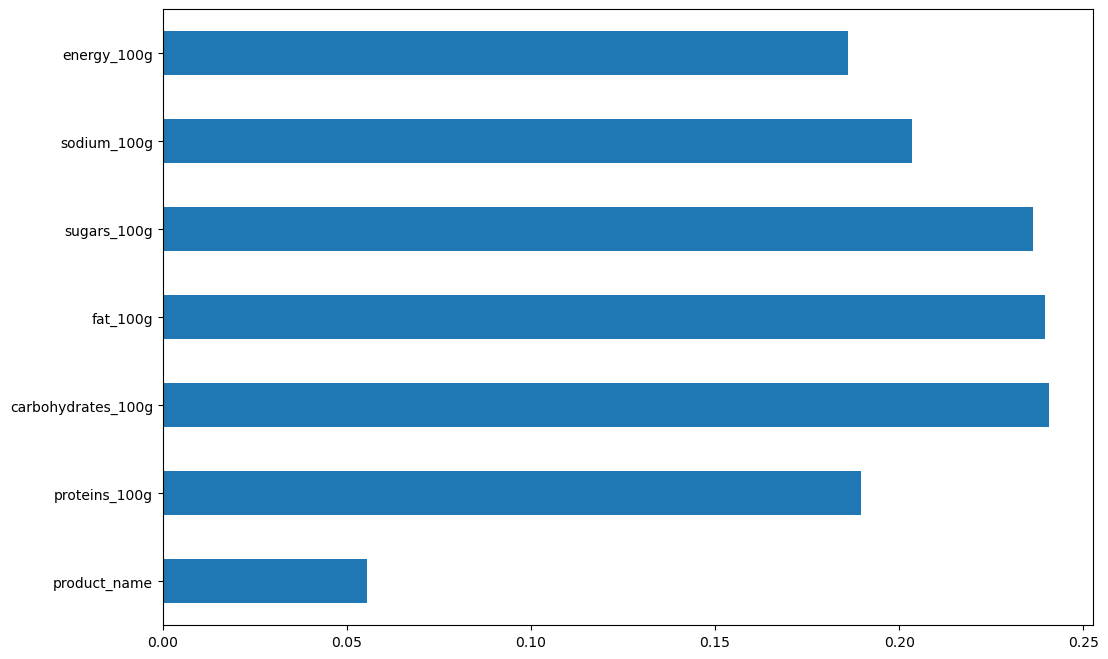

In [5]:
# Calculate the percentage of missing values in each column of the filtered dataframe and plot the results
df1.isnull().mean(axis=0).plot.barh(figsize=(12, 8))

In [6]:
# Filter out rows where any of the nutritional values (proteins, carbohydrates, fat, sugars, sodium) is greater than 100
# Also filter out rows where energy_100g is not equal to (4 * proteins_100g + 4 * carbohydrates_100g + 9 * fat_100g)
df1 = df1[(df1['proteins_100g'] < 100) |
          (df1['carbohydrates_100g'] < 100) |
          (df1['fat_100g'] < 100) |
          (df1['sugars_100g'] < 100) |
          (df1['sodium_100g'] < 100) |
          (df1['energy_100g'] == (4 * df1['proteins_100g'] + 4 * df1['carbohydrates_100g'] + 9 * df1['fat_100g']))]

In [7]:
# Drop rows where the 'product_name' is missing
df1.drop(df1[df1['product_name'].isna()].index, inplace=True)
# Check the shape of the filtered dataframe
df1.shape

(258833, 7)

In [8]:
# Create a copy of the filtered dataframe 'df1' and name it 'df2'
df2 = df1

In [9]:
# Define a factor 'f' to be used for outlier removal
f = 1.5

In [10]:
# Iterate through each column in 'df2'
for col in df2.columns:
    # Check if the column's data type is either float64 or int64
    if ((df2[col].dtype) == 'float64') or ((df2[col].dtype) == 'int64'):
        # Calculate the 10th and 90th percentiles of the column and use them to clip the outliers
        percentiles = df2[col].quantile([0.1, 0.9]).values
        df2[col][df2[col] <= percentiles[0]] = percentiles[0]
        df2[col][df2[col] >= percentiles[1]] = percentiles[1]
    else:
        # For non-numeric columns, do not make any changes
        df2[col] = df2[col]

# Check the shape of the dataframe 'df2'
df2.shape

/tmp/ipykernel_24705/953104397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][df2[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_24705/953104397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][df2[col] >= percentiles[1]] = percentiles[1]
/tmp/ipykernel_24705/953104397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][df2[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_24705/9531043

(258833, 7)

<Axes: >

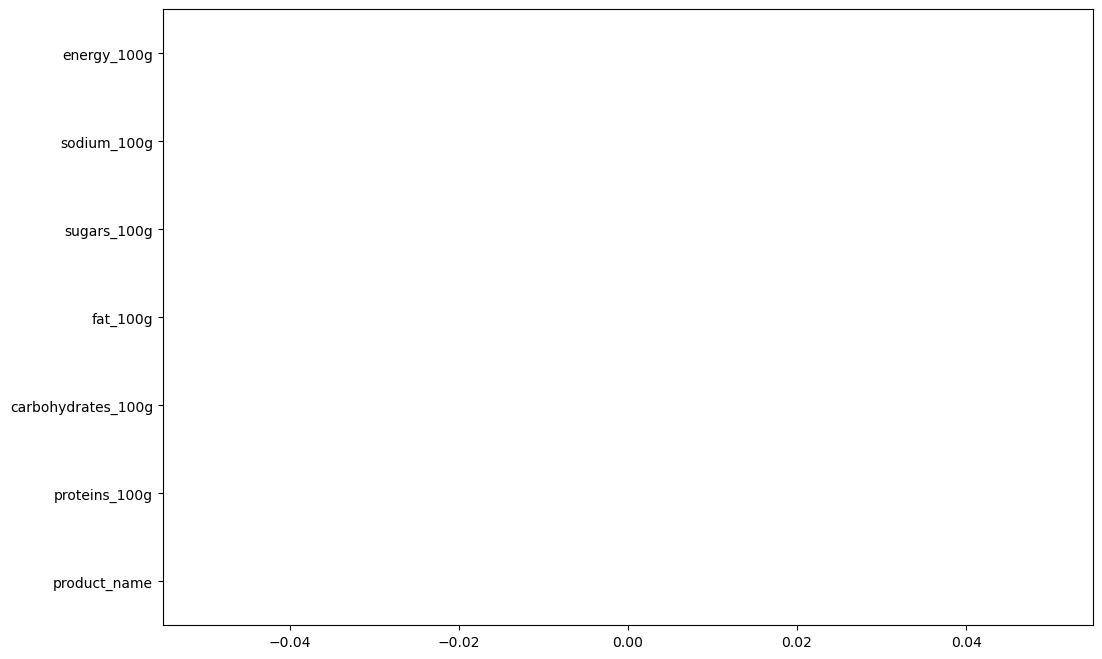

In [11]:
# Fill the missing values in 'df2' with the mean of each respective column and plot the results
df2.fillna(value=df2.mean(axis=0, numeric_only=True), axis=0, inplace=True)
df2.isnull().mean(axis=0).plot.barh(figsize=(12, 8))

## Data Analysis and Clustering

This notebook presents a step-by-step analysis of a dataset containing nutritional information about various food products. The objective is to perform data cleaning, explore the data distribution, and apply clustering techniques to identify distinct food clusters.



### Dataset Description

The dataset is sourced from a CSV file named 'cleaned.csv', containing information about different food products and their corresponding nutritional values per 100 grams, such as proteins, carbohydrates, fats, sugars, sodium, and energy content.



### Step 1: Data Loading and Initial Exploration

The dataset is loaded into a Pandas DataFrame, and the first few rows are displayed to understand its structure and contents. The shape of the dataset (number of rows and columns) is examined to get an overview of the data size.



In [12]:
# Save the cleaned dataframe 'df2' to a new CSV file called 'cleaned.csv' without index column
df2.to_csv('cleaned.csv', index=False)

In [13]:
# Check the shape of the dataset (number of rows and columns)
df.shape

(320772, 162)

### Step 2: Outlier Detection and Visualization

Box plots and histograms with Kernel Density Estimation (KDE) are used to detect and visualize outliers in the nutritional values. Understanding data distribution is crucial for subsequent analysis.



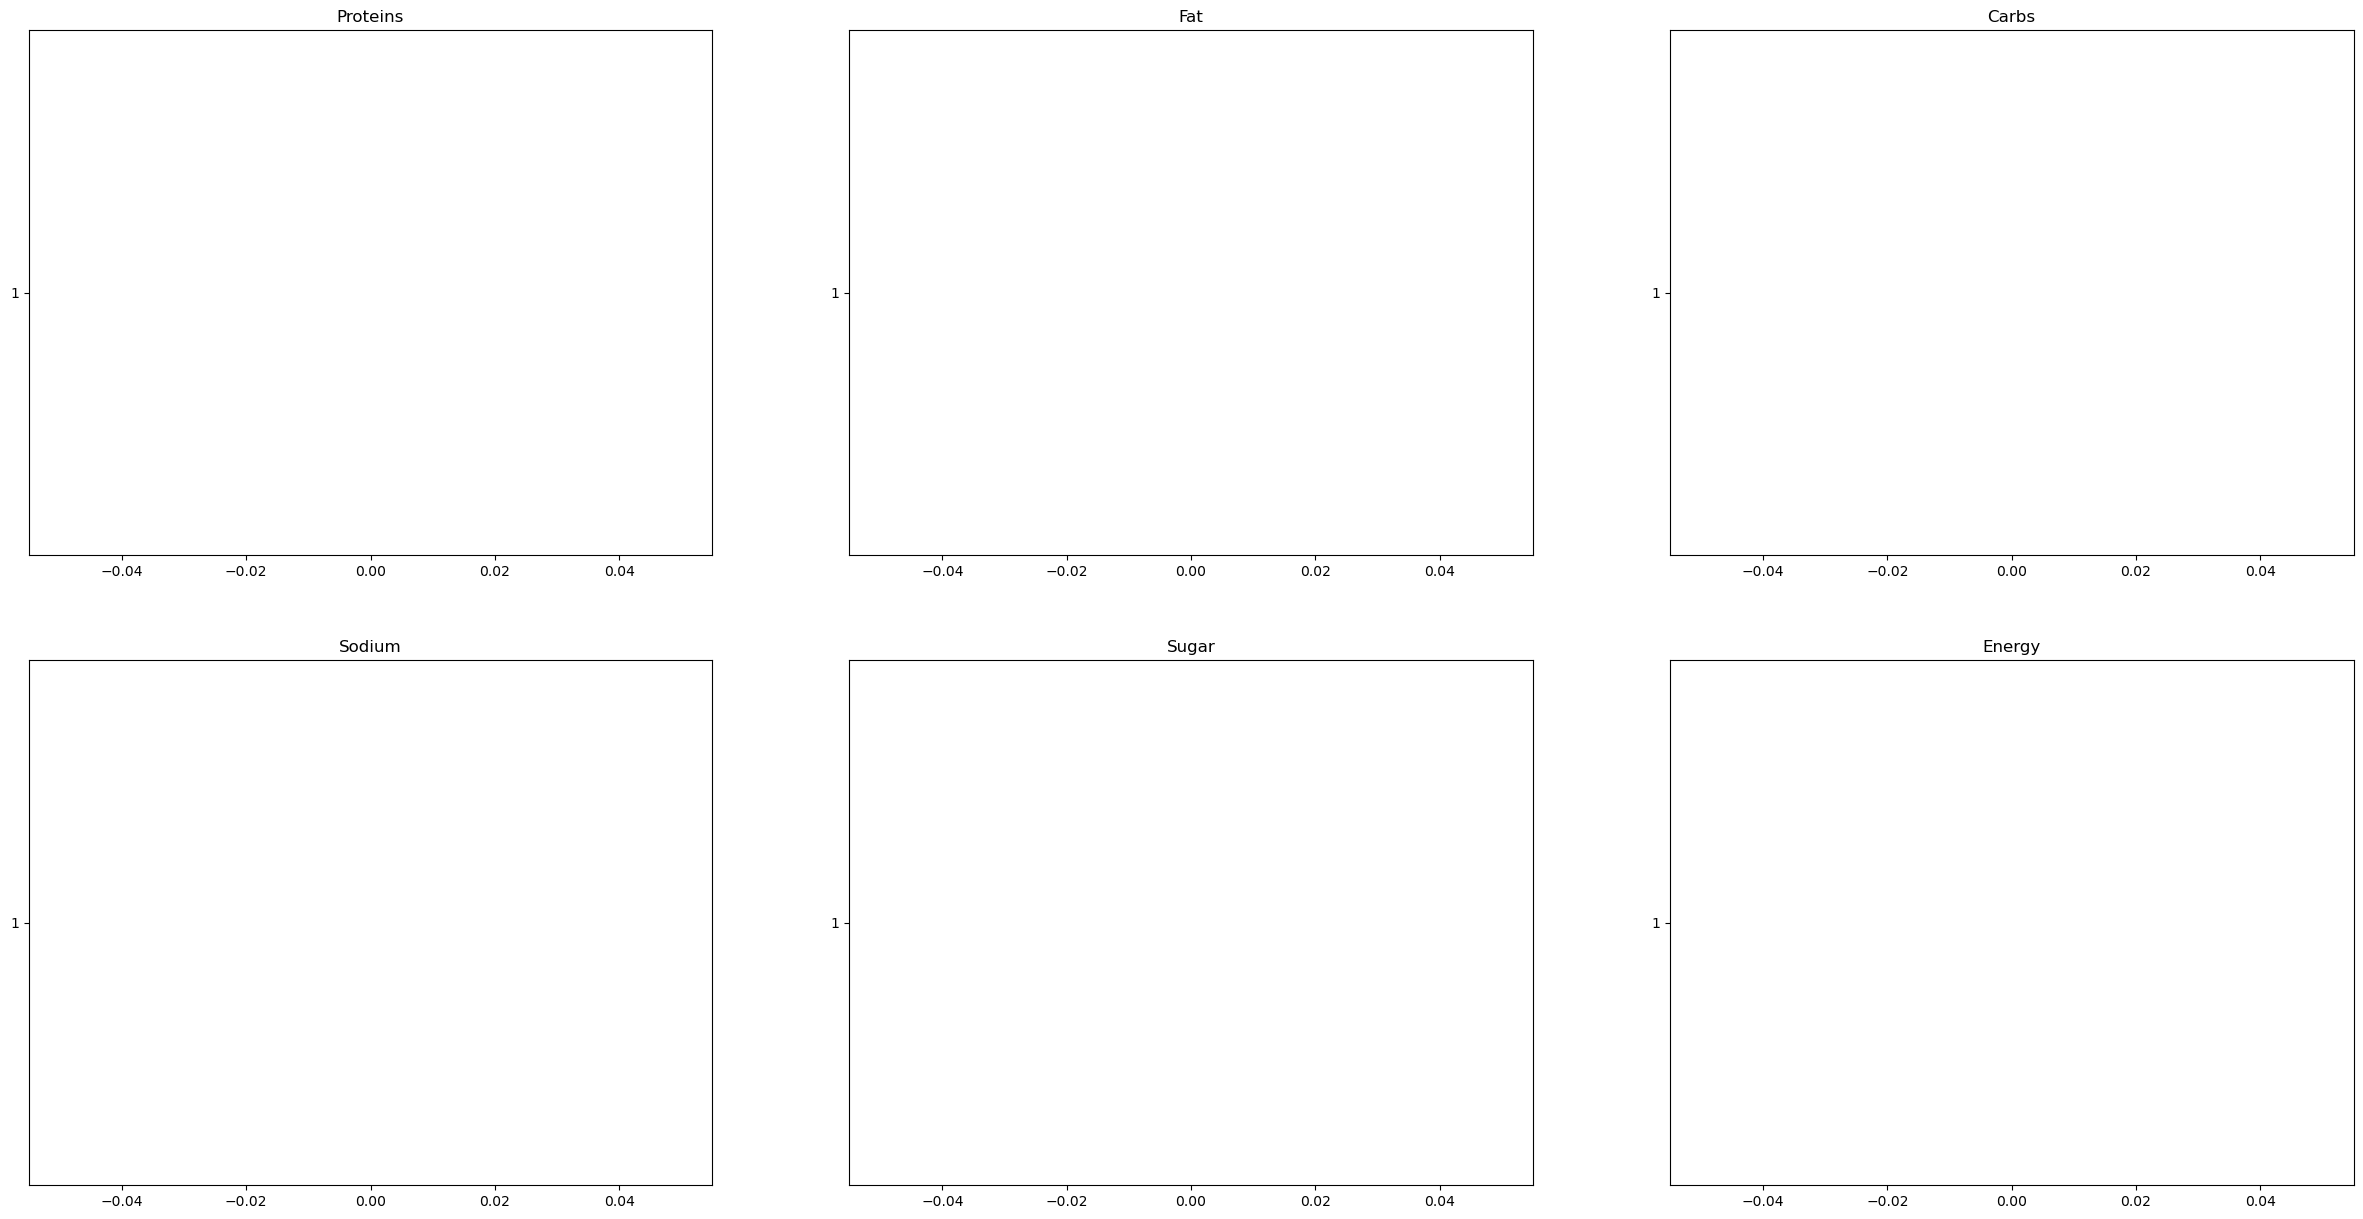

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(30,15))

axs[0, 0].boxplot(df['proteins_100g'],vert=False)
axs[0, 0].set_title('Proteins')
axs[0, 1].boxplot(df['fat_100g'], 0, 'gD',vert=False)
axs[0, 1].set_title('Fat')
axs[0, 2].boxplot(df['carbohydrates_100g'],vert=False)
axs[0, 2].set_title('Carbs')
axs[1, 0].boxplot(df['sodium_100g'],vert=False)
axs[1, 0].set_title('Sodium')
axs[1, 1].boxplot(df['sugars_100g'],vert=False)
axs[1, 1].set_title('Sugar')
axs[1, 2].boxplot(df['energy_100g'],vert=False)
axs[1, 2].set_title('Energy')

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3)
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=df, x='proteins_100g', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='carbohydrates_100g', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='fat_100g', kde=True, ax=axes[0,2])
sns.histplot(data=df, x='sodium_100g', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='sugars_100g', kde=True, ax=axes[1,1])
sns.histplot(data=df, x='energy_100g', kde=True, ax=axes[1,2])

In [ ]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.pairplot(df, diag_kind="hist")

In [ ]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

### Step 3: Correlation Analysis

Pair plots and a correlation heatmap are employed to explore relationships between different nutritional values. Identifying correlations helps to understand dependencies and potential groupings.



In [ ]:
# Visualize pair plots for correlation analysis between nutritional values
sns.set(rc={'figure.figsize': (18, 8)})
sns.pairplot(df, diag_kind="hist")
plt.show()

In [ ]:
# Visualize the correlation matrix as a heatmap
sns.set(rc={'figure.figsize': (18, 8)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Step 4: Statistical Tests

Hypothesis tests are conducted to assess the data's suitability for further analysis. The Chi-Square Test for independence examines the independence of variables, and the Shapiro-Wilk Test checks normality assumptions.



In [ ]:
# Check conditions for performing ANOVA
# Condition 1: Samples are independent - Perform Chi-Square Test
chi2_stat, p_val, dof, expected = st.chi2_contingency(df.iloc[:, 1:])
# (display test statistics and p-value)

In [ ]:
# Condition 2: Samples need to follow a normal distribution - Perform Shapiro-Wilk Test
shapiro_results = []
for col in df.columns[1:]:
    shapiro_stat, shapiro_p = st.shapiro(df[col])
    shapiro_results.append((col, shapiro_p))
# (display the p-values for each nutritional value)

In [ ]:
# Perform Levene's test to check if variances are equal for ANOVA
levene_stat, levene_p = st.levene(df['proteins_100g'], df['carbohydrates_100g'], df['fat_100g'], df['sugars_100g'], df['sodium_100g'], df['energy_100g'])
# (display the p-value)

### Step 5: ANOVA (Analysis of Variance)

The F-test in ANOVA is applied to compare the means of various nutritional values. It helps determine if there are significant differences between the groups.



In [ ]:
# Perform ANOVA (F-test) to compare means of different nutritional values
f_stat, f_p = st.f_oneway(df['proteins_100g'], df['carbohydrates_100g'], df['fat_100g'], df['sugars_100g'], df['sodium_100g'], df['energy_100g'])
# (display the p-value)

In [ ]:
# Apply KMeans clustering to identify clusters in the data
inertia_values = []
for i in range(1, 50):
    kmeans = km(n_clusters=i)
    kmeans.fit(df.iloc[:, 1:])
    inertia_values.append(kmeans.inertia_)
# (plot the Elbow Method to determine the optimal number of clusters)

In [ ]:
# Perform KMeans clustering with the chosen number of clusters
kmeans = km(n_clusters=8)
kmeans.fit(df.iloc[:, 1:])

In [ ]:
# Visualize the clusters in a 3D scatter plot based on carbohydrates, proteins, and fat
colormap = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['carbohydrates_100g'], df['proteins_100g'], df['fat_100g'], c=colormap[kmeans.labels_])
ax.set_xlabel('Carbs')
ax.set_ylabel('Protein')
ax.set_zlabel('Fat')
ax.view_init(45, -45)
plt.show()

### Step 6: Principal Component Analysis (PCA)

PCA is used to reduce the dimensionality of the dataset while retaining as much variance as possible. The Scree plot visualizes the explained variance by each principal component, aiding in dimension reduction.



In [ ]:
# Perform Principal Component Analysis (PCA) to reduce dimensions
df_scaled = df.iloc[:, 1:]
df_scaled = pp.StandardScaler().fit_transform(df_scaled)
df_scaled = pd.DataFrame(data=df_scaled)

pca = PCA()
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

In [ ]:
# Plot Scree plot to visualize explained variance by principal components
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.plot(np.arange(len(per_var)) + 1, per_var.cumsum(), c="red", marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percentage Explained Variance")
plt.title("Scree plot")
plt.show(block=False)

In [ ]:
# Visualize the PCA Graph using PC1 and PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title('PCA Graph')
plt.show()

### Step 7: KMeans Clustering

The Elbow Method is utilized to identify the optimal number of clusters. KMeans clustering groups similar food products based on their nutritional values. The resulting clusters are visualized in 2D and 3D scatter plots.



In [ ]:
# Perform KMeans clustering on the PCA transformed data
inertia_values = []
for i in range(1, 50):
    kmeans = km(n_clusters=i)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)
# (plot the Elbow Method to determine the optimal number of clusters)

In [ ]:
# Perform KMeans clustering with the chosen number of clusters on PCA data
kmeans = km(n_clusters=8)
kmeans.fit(pca_df)

In [ ]:
# Visualize the clusters in a 2D scatter plot based on PC1 and PC2
colormap = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colormap[kmeans.labels_], s=20)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title('PCA Graph with Clusters')
plt.show()

In [ ]:
# Visualize the clusters in a 3D scatter plot based on PC1, PC2, and PC3
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=colormap[kmeans.labels_])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(45, -45)
plt.show()

In [ ]:
# Visualize the clusters in a 3D scatter plot with different angles
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=colormap[kmeans.labels_])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(135, 60)
plt.show()

### Step 8: Recipe Generator

A simple recipe generator is proposed, randomly selecting food items from categories based on their dominant macronutrient (protein, carbohydrate, or fat) to create balanced meals.



In [ ]:
# Generator of Recipes
# We separate foods based on their dominant macronutrient (protein, carbohydrate, fat).
# To generate a meal, we randomly choose one item from each category.

# Filter foods with higher protein content
dfp = df[df['proteins_100g'] > 20]
# Filter foods with higher carbohydrate content
dfc = df[df['carbohydrates_100g'] > 50]
# Filter foods with higher fat content
dff = df[df['fat_100g'] > 20]

# Display the first few rows of each filtered category
dfp.head()
dfc.head()
dff.head()


## Conclusion

This notebook provides a detailed analysis of the dataset, showcasing data cleaning, exploratory data analysis, and clustering techniques. The clustering results offer valuable insights into distinct groups of food products based on their nutritional composition. Moreover, the recipe generator demonstrates how this information can be practically utilized.

The combination of statistical analysis, data visualization, and clustering opens up opportunities for further research and applications in nutrition and dietary planning.

_**Note:** Before running this notebook, ensure that the dataset 'cleaned.csv' is available and located in the same directory._

---